<a href="https://colab.research.google.com/github/isharaju/NLP_author_identification/blob/main/author_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things to do:
1. Replace new lines with space 
2. What to do with words like Gemme?
3. Unknown [possible:words treatment?]
4. Change matric accuracy with F1 Prec-Recall and perplexity
5. Handling sentences with --: you are come at last--how I have longed for you!  Sit by me--do not leave me--never leave me again, Sandy, never again. Where is your hand --give it me, dear
6. Program to delete any author name left in the corpus
7. Getting rid of numbers and square brackets: eg. ACD-> Study in scarlet: “looking for lodgings.” [3] i answered.


In [45]:
# loading the libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import collections 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import os

import numpy as np
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# mounting the directory
from google.colab import drive
# commented as it is mounted now
#drive.mount('/content/drive/My Drive/NLPRutgers_Project')

In [57]:
def read_file(path):
  with open(path, "r") as input:
      document_collection = input.read().split("\n\n")
  return document_collection

def split(doc):
    pattern = r'[A-Za-z0-9]+'
    stop_words = set(stopwords.words('english'))
    tokens = nltk.regexp_tokenize(doc, pattern)
    filtered_sentence = [w for w in tokens if not w in stop_words]   
    return filtered_sentence

def doc_vocab(filestream):
    file = filestream
    
    collection = []
    lexicon_count = {}
    index = -1

    for doc in file:
        doc=doc.lower().rstrip()
        collection.append(doc)
        tokens = split(doc)
        
        for word in tokens:
            if lexicon_count.get(word, -1) ==-1:
                lexicon_count[word] =1
            else:
                lexicon_count[word] +=1
                
    return lexicon_count, collection



# creating a parent function
def book_to_corpus(path, author, author_num, genre):
  # reading the file and storing into collection
  document_collection = read_file(path)

  # creating a document vocab
  vocab, coll = doc_vocab(document_collection)
  vocab = {k: v for k, v in sorted(vocab.items(), key=lambda item: item[1], reverse=True)}
  
  # filtering coll
  result = []
  for c in coll:
    if len(c) > 30:
      result.append(c)

  # creting a dataframe
  words = list(vocab.keys())
  freqs = list(vocab.values())
  
  # using the 2 lists we can create a df
  # this one is used to create word cloud and only vocab is used and
  # not the whole collection
  df_cloud = pd.DataFrame(
    {
        'Author': author,
     'Author Number': author_num,
     'Genre': genre,
        'word': words,
     'frequency': freqs
    })
  
  # now we are creating a seperate one
  # to create a df for storing collection
  df = pd.DataFrame(
    {
        'Author': author,
     'Author Number': author_num,
     'Genre': genre,
        'Sentence': result
    })
  

  visualize_word_freq(document_collection, vocab)
  return df


def visualize_word_freq(document_collection, vocab):
  lexicon_count, collection = doc_vocab(document_collection)
  top = collections.Counter(lexicon_count).most_common()
  x_list = []
  y_list = []
  for i in range(len(top)):
      x_list.append(top[i][0])
      y_list.append(top[i][1])
  d = {"word": x_list, "frequency":y_list}
  d1 = pd.DataFrame(d)
  print(d1.head())

  # bar plot to show most frequent words from the corpus
  plt.figure(figsize=(15,10))
  sns.set_theme(style="whitegrid")
  ax = sns.barplot(x="word", y="frequency", data=d1[:20],palette="Blues_d")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=270, ha="right")


  # builiding the word cloud from the vocab
  plt.figure(figsize=(10,5))
  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=vocab)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

  # to make word cloud with shape
  import codecs
  import base64
  encoded = base64.b64encode(open("filename.png", "rb").read())
  # f3 = open("maark_twain.jpg", "wb")
  # f3.write(codecs.decode(hpl_64,'base64'))
  # f3.close()
  # img3 = imread("maark_twain.jpg")
  # hcmask3 = img3;

    word  frequency
0   said        207
1   upon        198
2    one        162
3    man        155
4  would        123


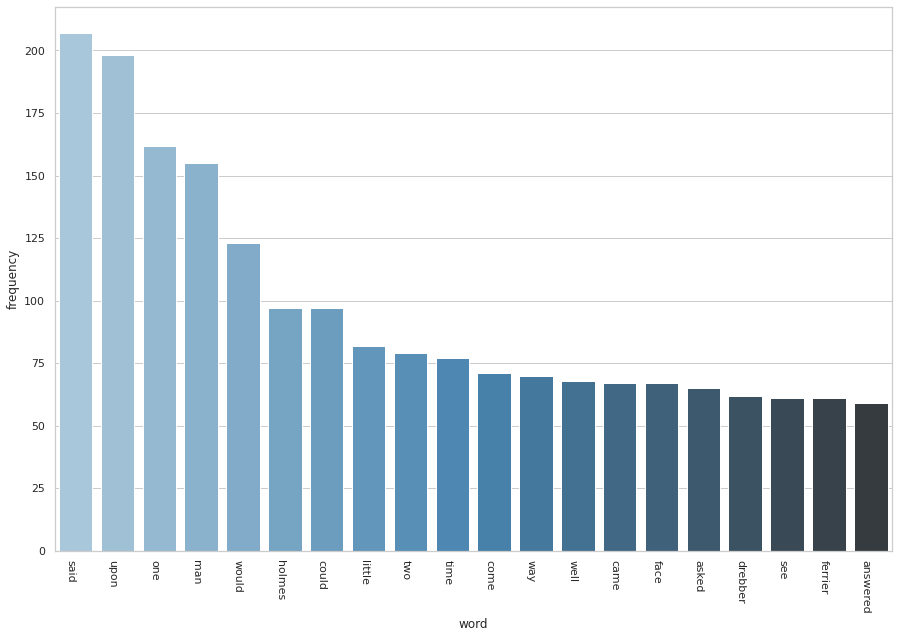

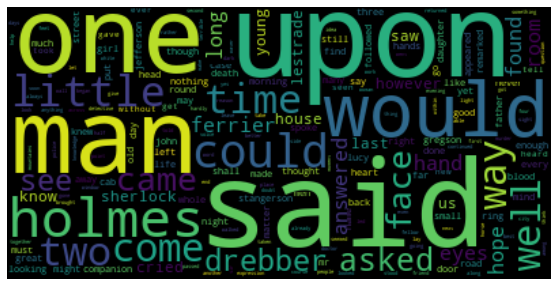

     word  frequency
0    said        486
1    upon        465
2  holmes        461
3     one        376
4   would        327


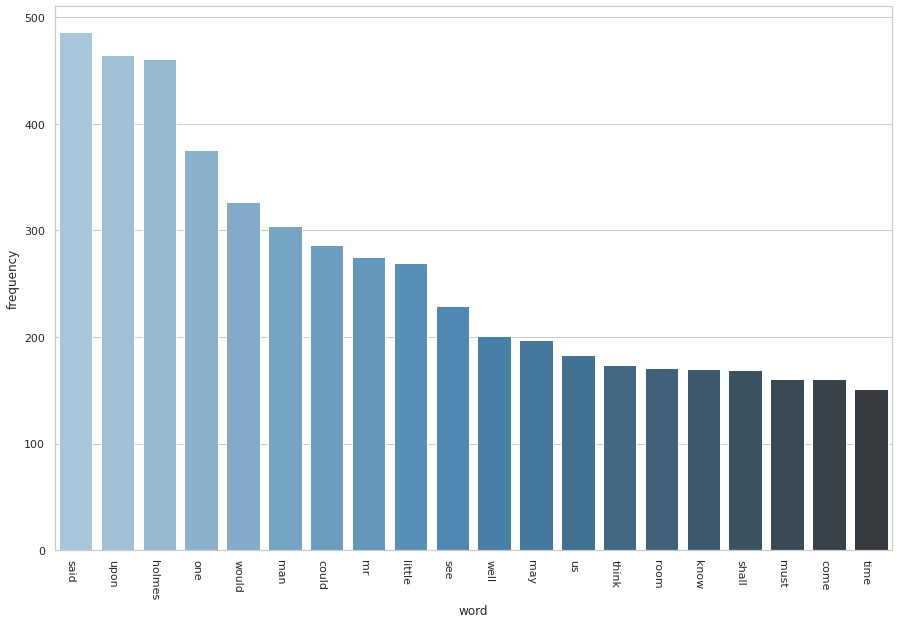

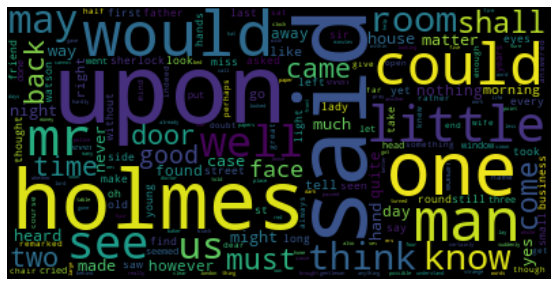

   word  frequency
0   sir        350
1  upon        314
2   one        247
3  said        240
4   man        213


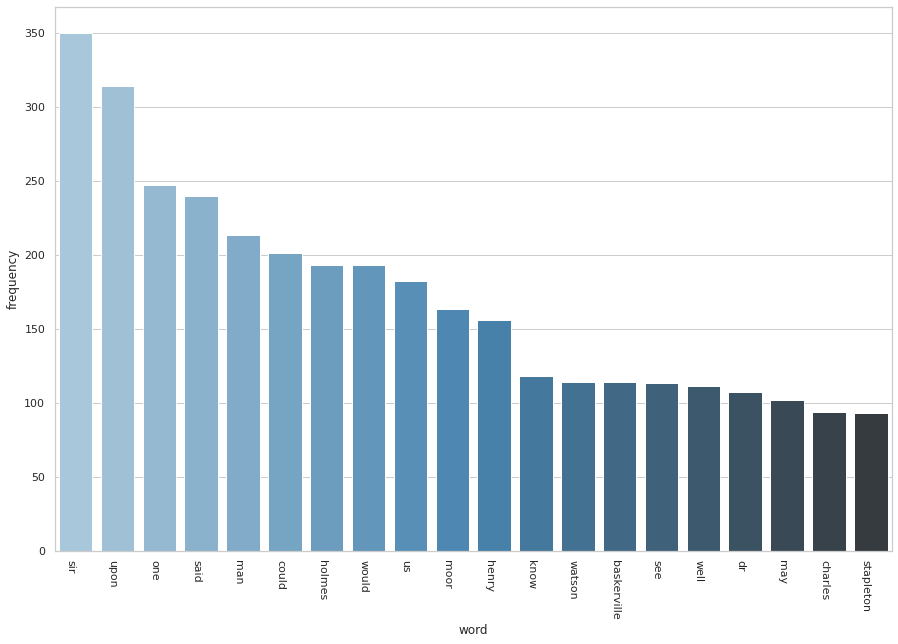

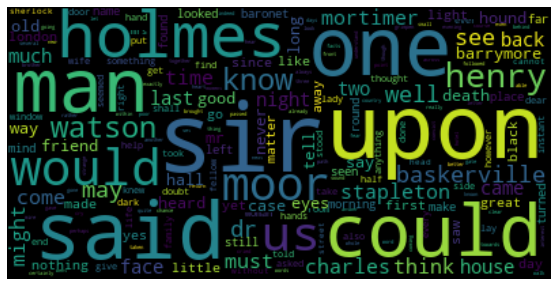

    word  frequency
0   upon        411
1     us        333
2    one        301
3   said        297
4  could        291


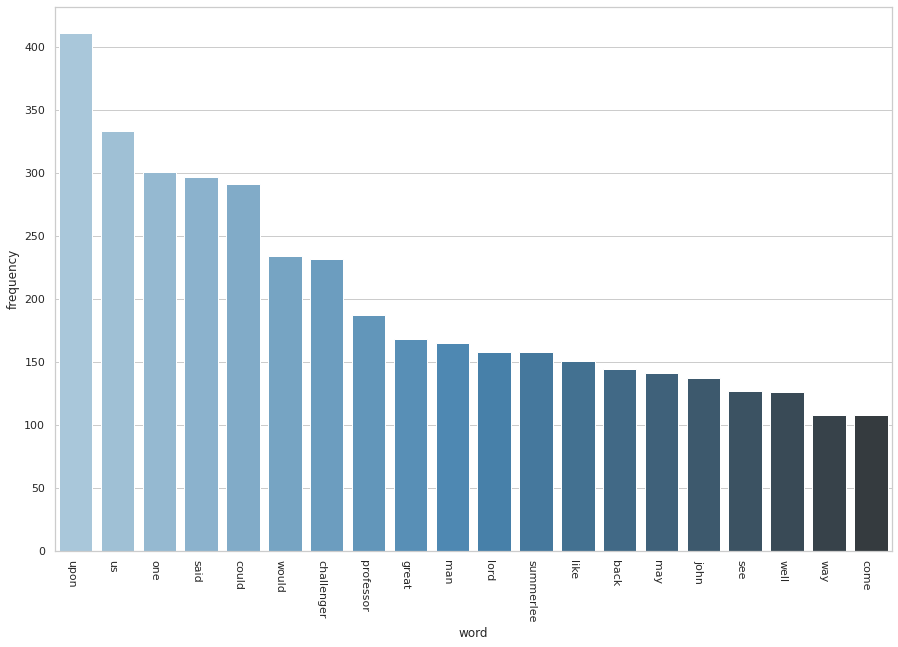

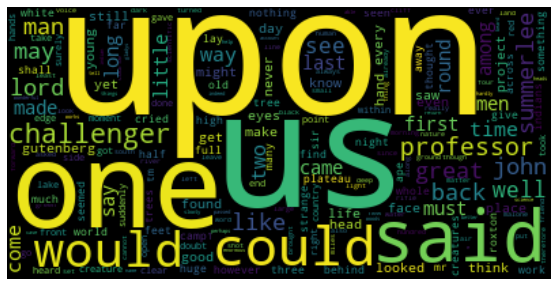

    word  frequency
0   said        224
1   upon        193
2    one        175
3    man        146
4  could        143


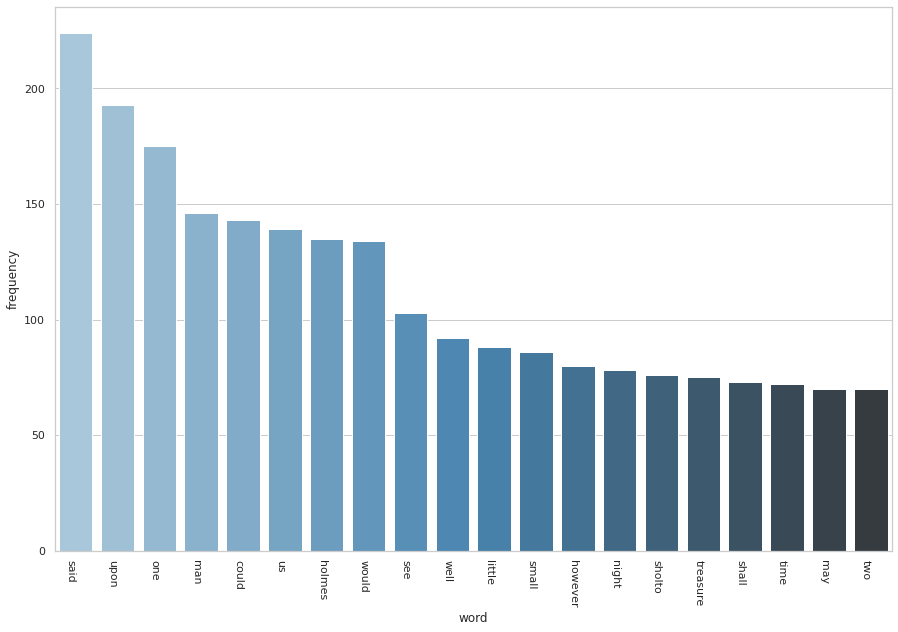

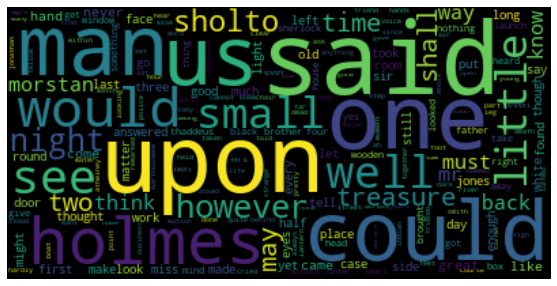

      word  frequency
0  leopard        429
1      man        283
2      one        243
3    would        224
4    eater        173


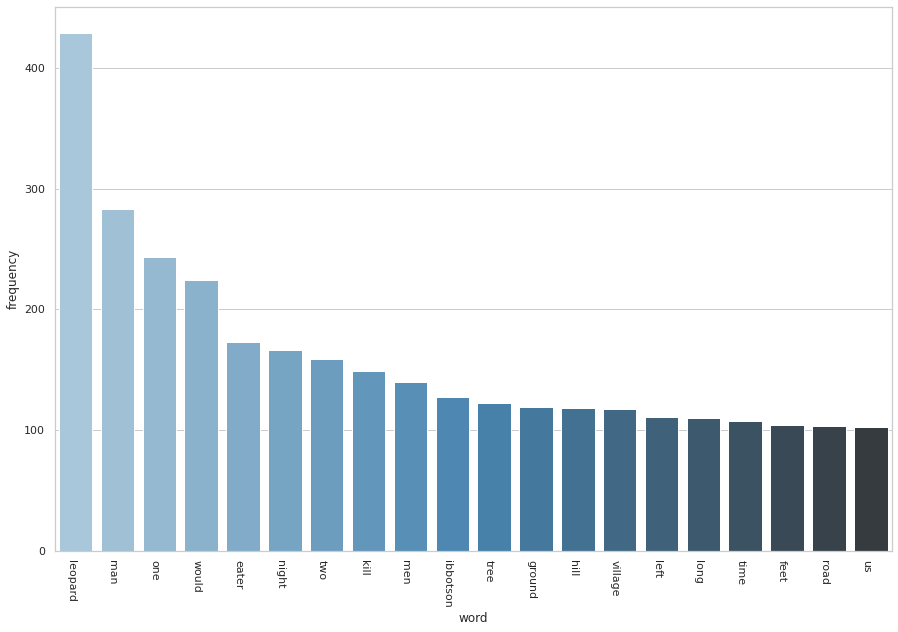

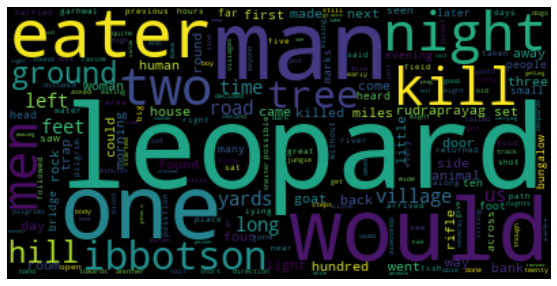

      word  frequency
0    tiger        422
1      man        330
2      one        322
3    would        322
4  tigress        272


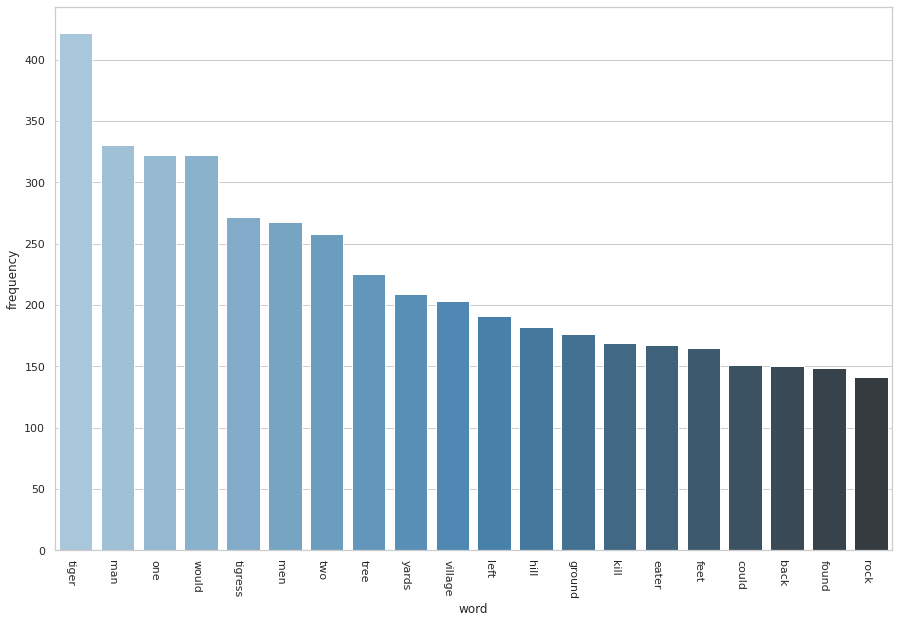

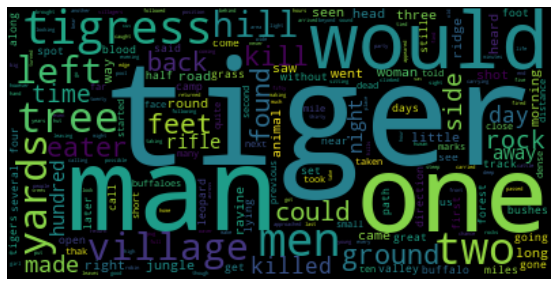

    word  frequency
0    one        242
1  would        206
2    two        185
3    men        169
4    man        154


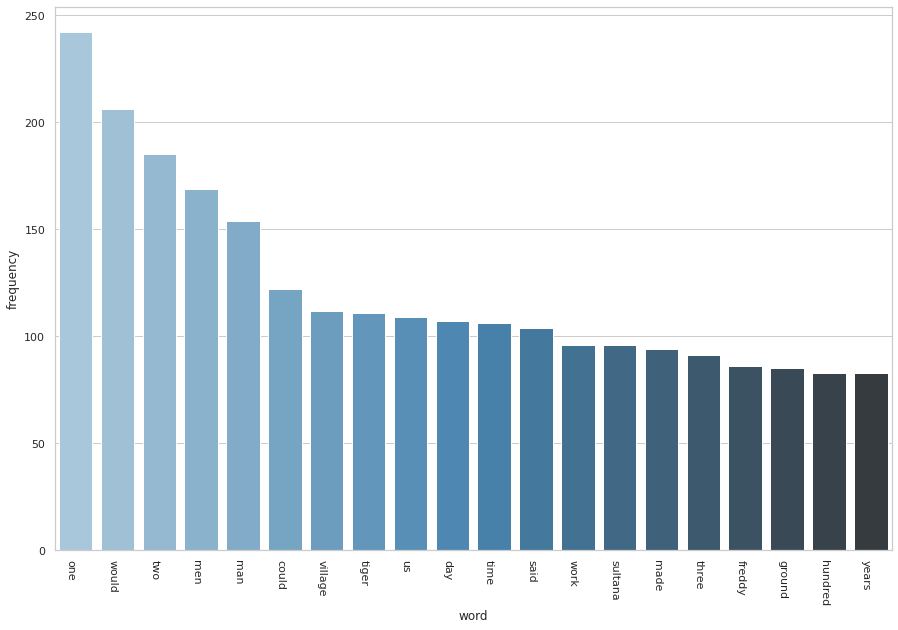

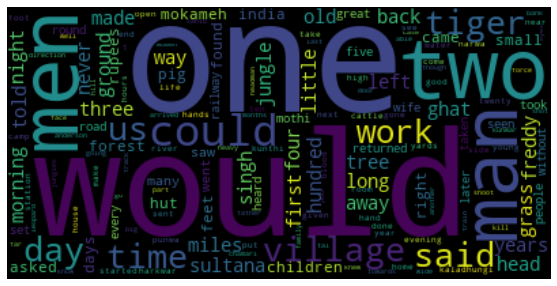

    word  frequency
0  tiger        428
1  would        264
2    man        256
3    men        231
4    one        226


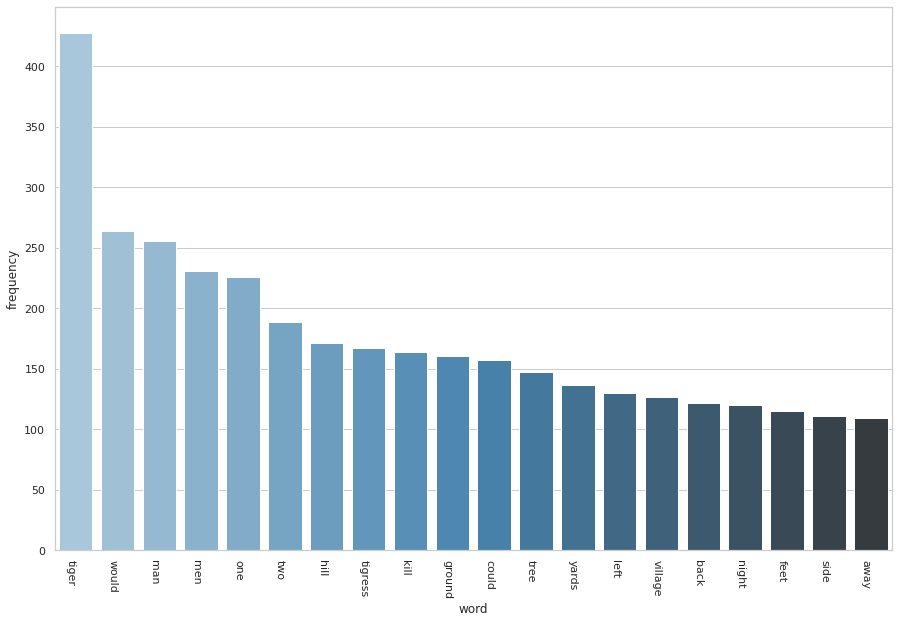

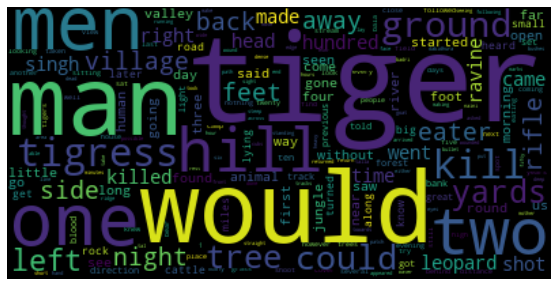

        word  frequency
0   princess         40
1       tree         35
2  elephants         26
3     forest         23
4       salt         21


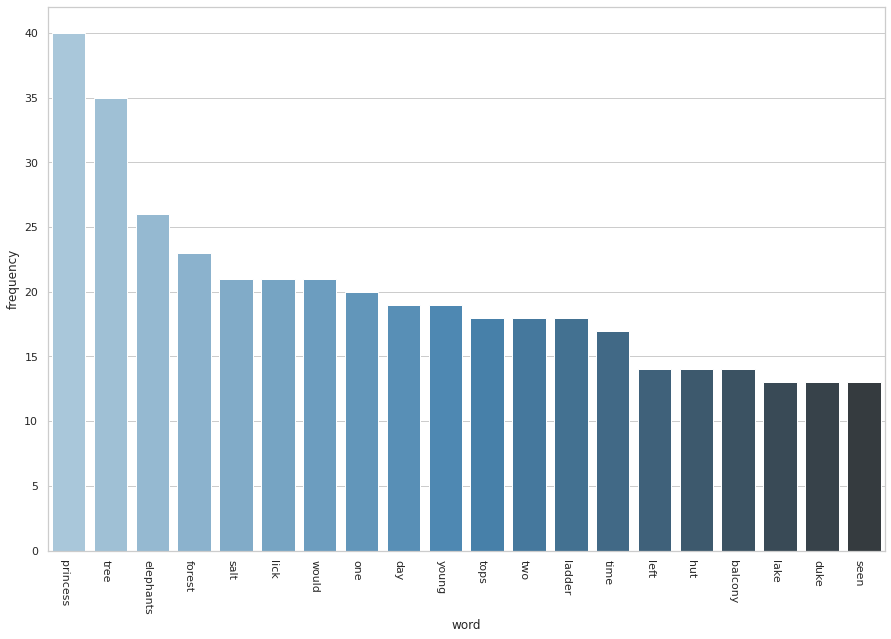

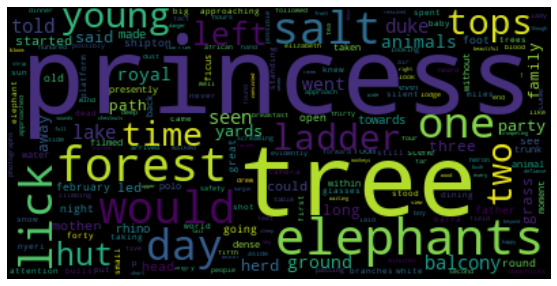

    word  frequency
0  would        541
1    one        465
2   said        404
3  could        381
4   king        371


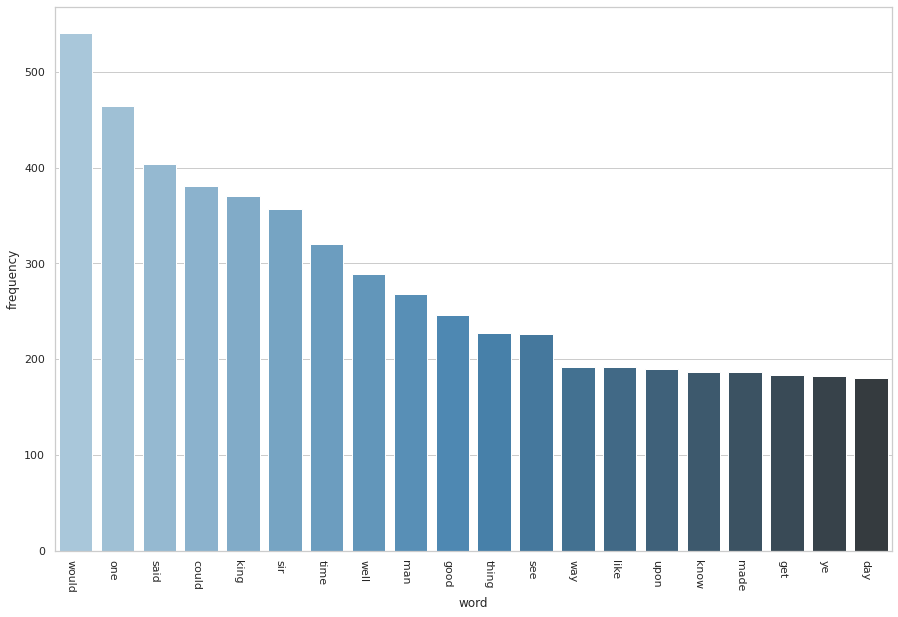

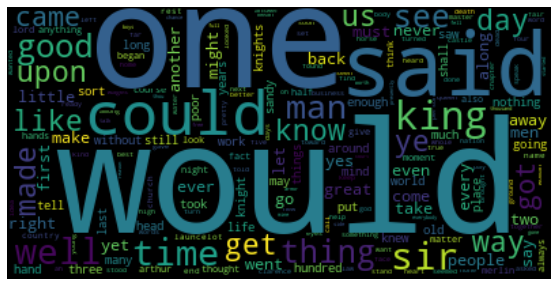

   word  frequency
0  says        637
1   got        623
2  said        491
3   see        477
4  well        417


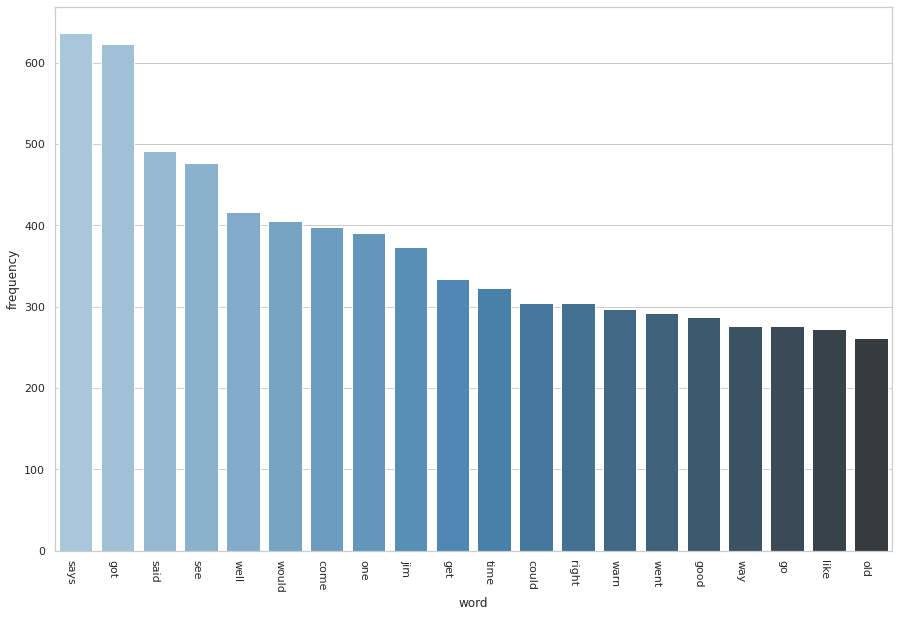

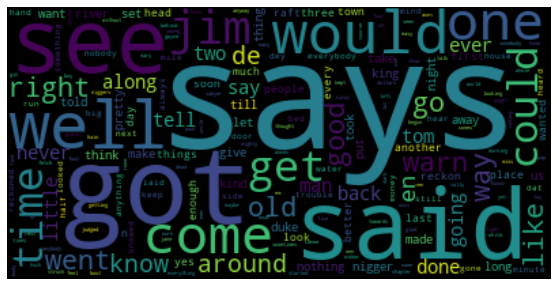

    word  frequency
0    tom        773
1   said        356
2   huck        249
3  would        241
4   time        189


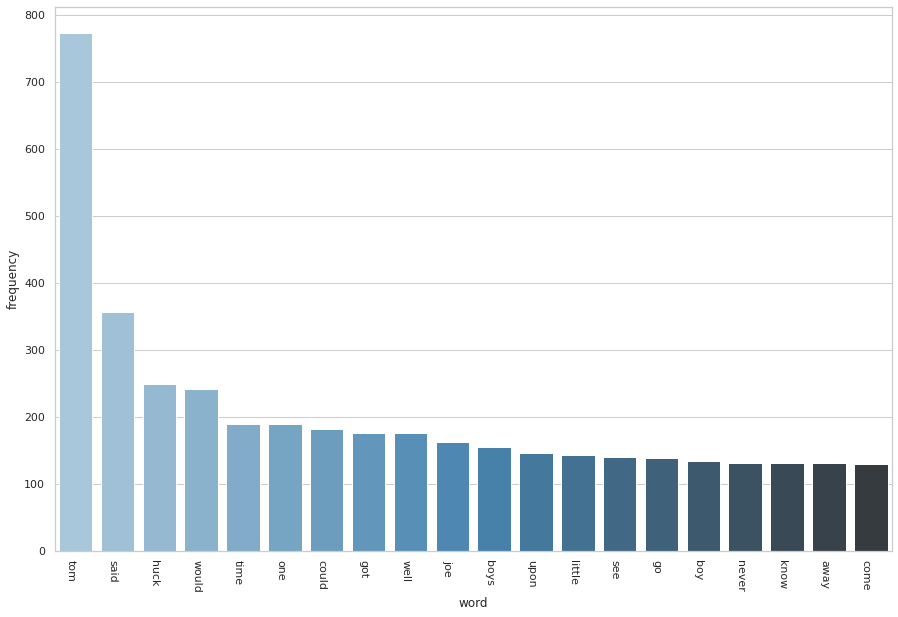

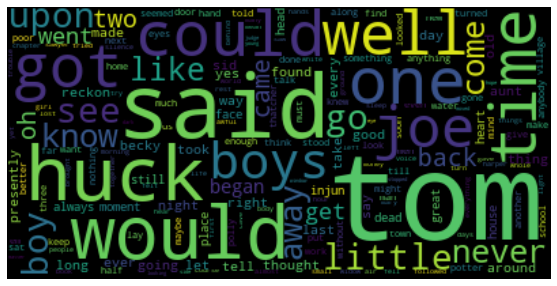

    word  frequency
0    one        908
1  would        484
2     us        462
3   upon        449
4  could        443


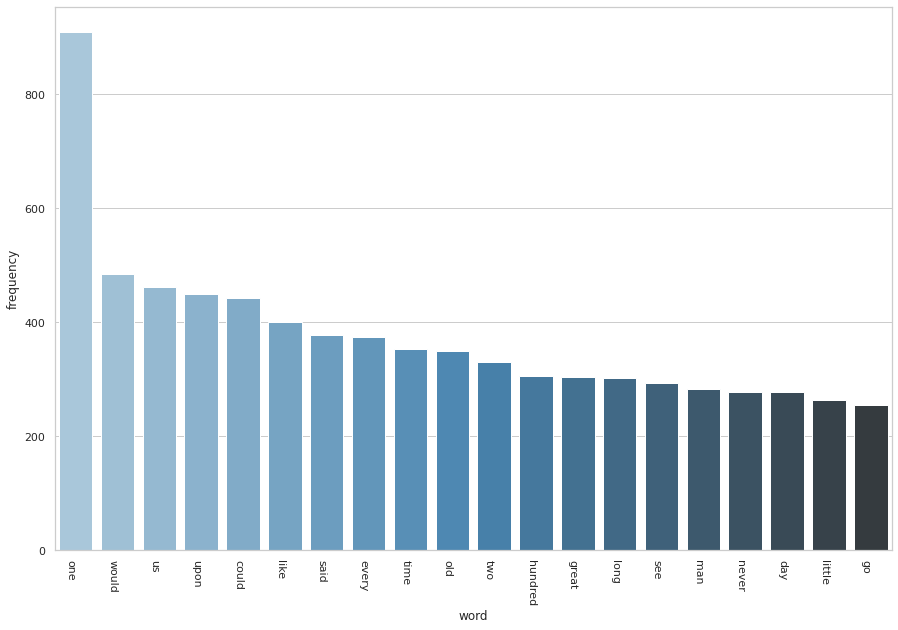

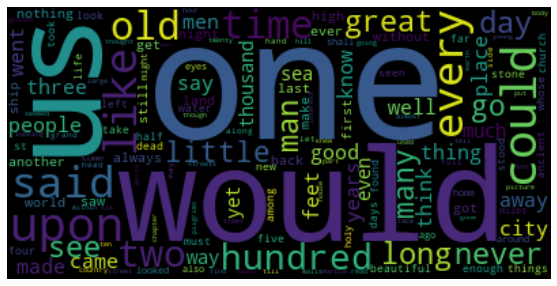

   word  frequency
0  king        447
1  thou        288
2  said        272
3  upon        271
4   tom        251


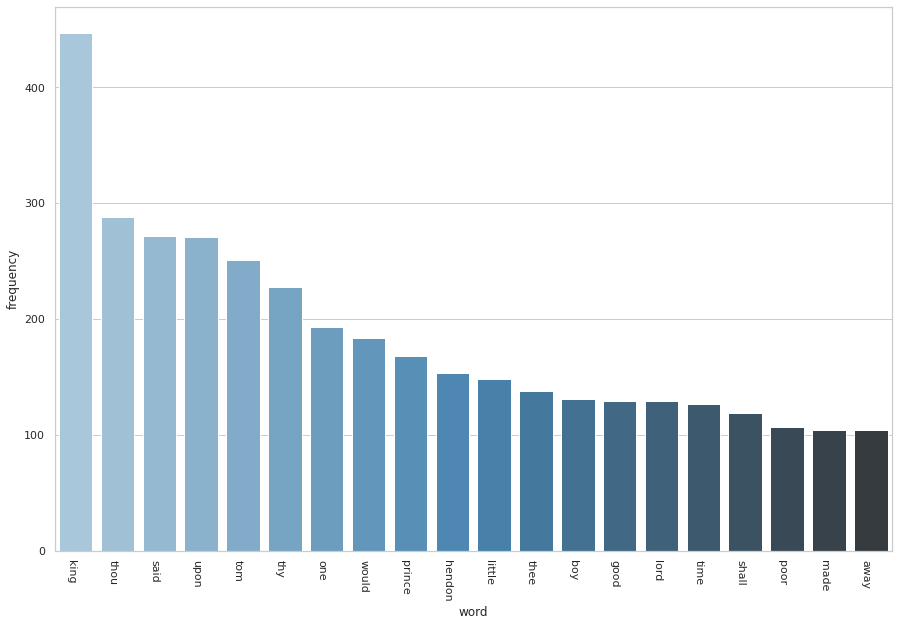

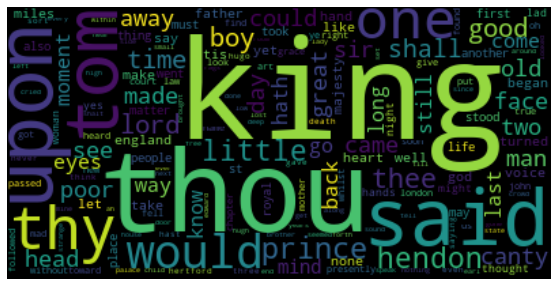

    word  frequency
0   said        425
1  jacob        393
2    one        291
3    mrs        231
4   like        166


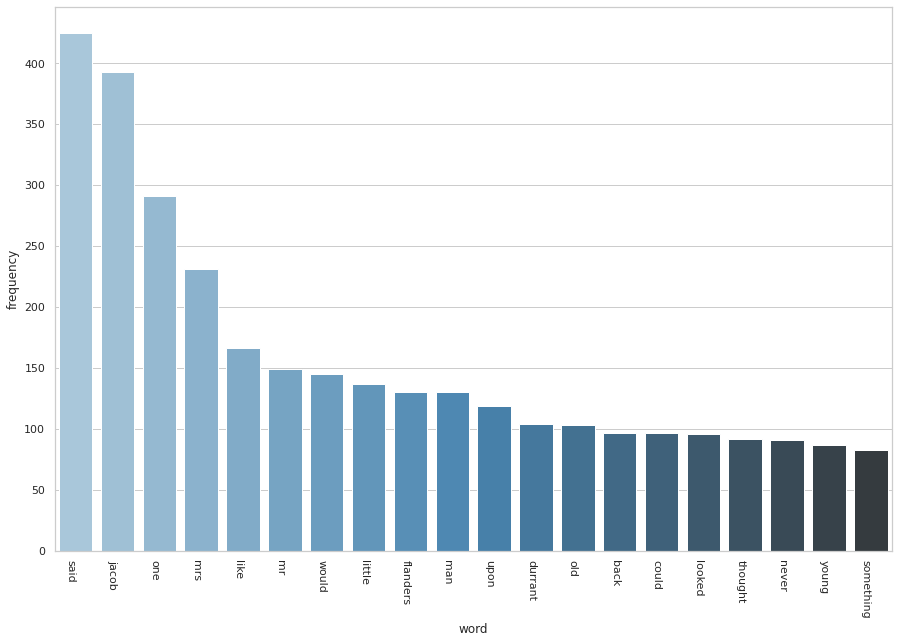

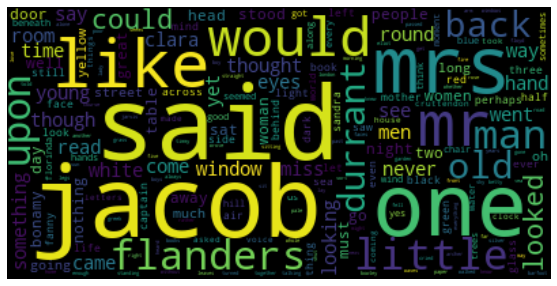

   word  frequency
0   one        107
1  said         58
2  like         49
3    us         44
4  upon         39


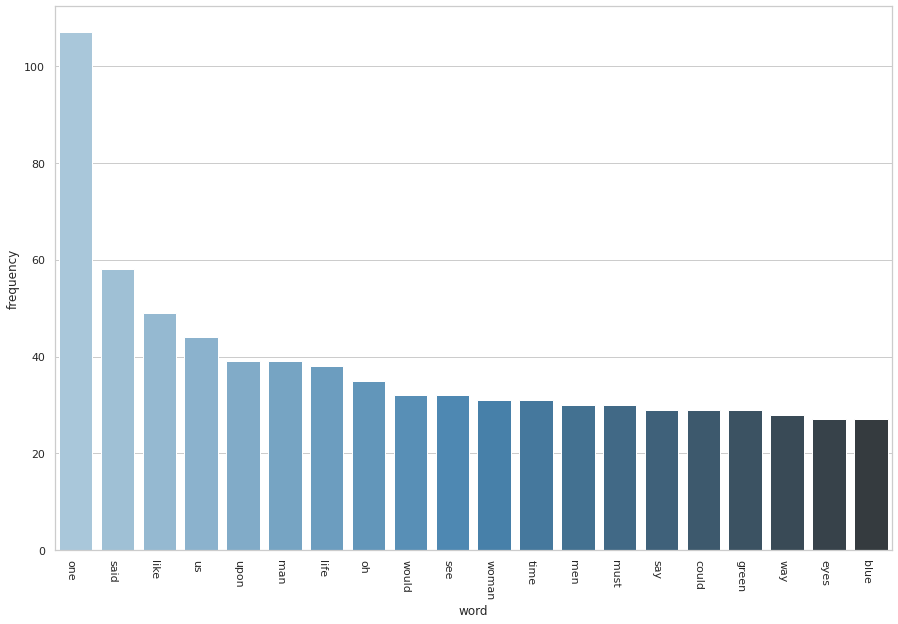

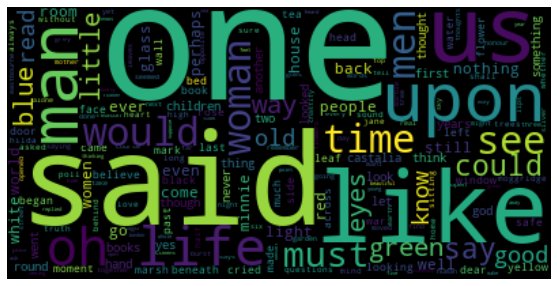

       word  frequency
0  clarissa         42
1   thought         36
2      said         33
3       one         22
4     would         17


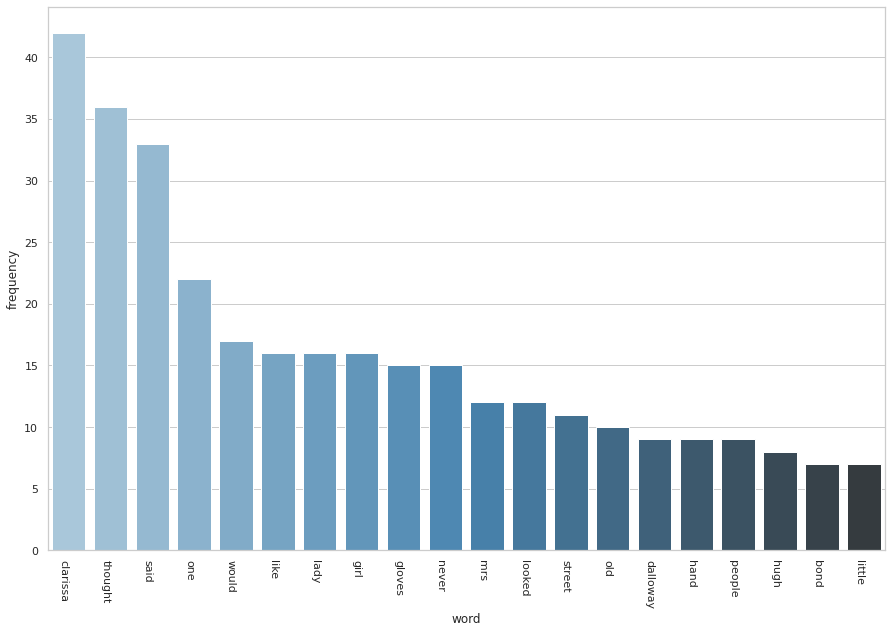

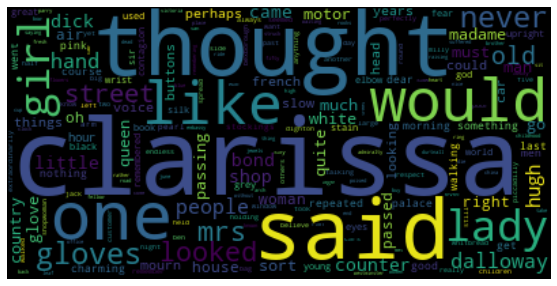

        word  frequency
0  katharine        483
1        one        429
2       said        352
3       mary        265
4      would        259


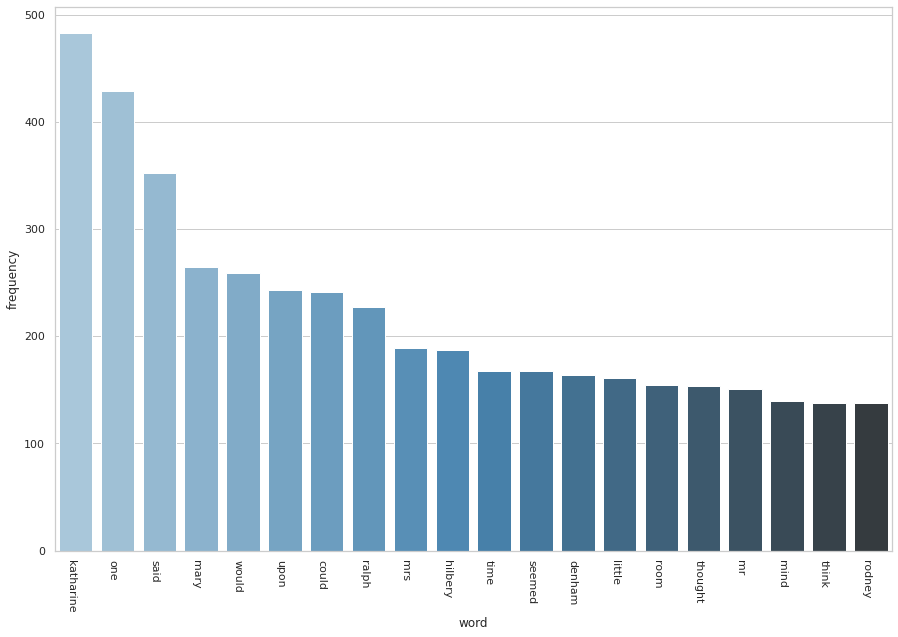

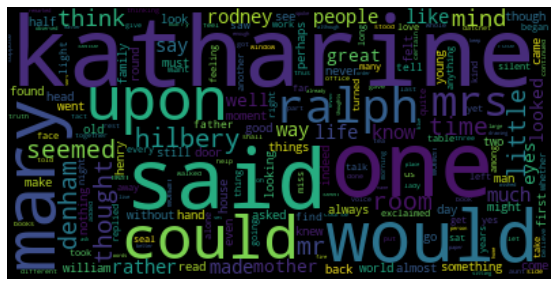

     word  frequency
0    said        874
1     one        810
2  rachel        585
3     mrs        440
4    like        408


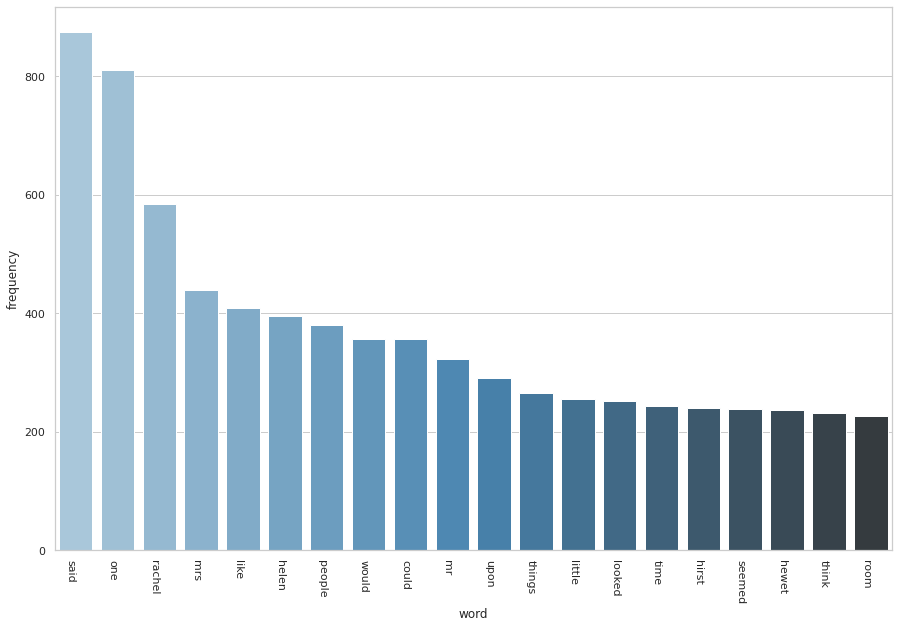

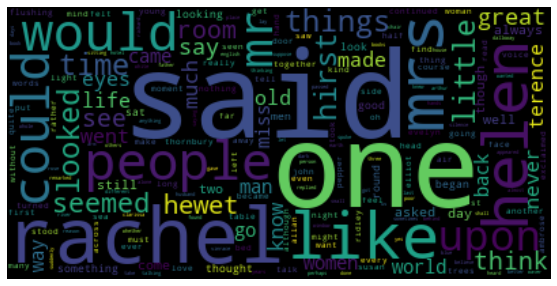

In [62]:
# initializing an array to store author names
authors = ["Arthur Conan Doyle", "Jim Corbett", "Mark Twain", "Virginia Woolf"]

# for each author we are selecting 5 books and storing the genres in array
genre = ["crime", "crime", "crime", "science fiction", "crime", "wildlife", "wildlife", "travel", "wildlife", "unknown", "children", "children", "children", "children", "children", "non-fiction", "non-fiction", "non-fiction", "non-fiction", "non-fiction"]

# for each file creating a df 
df_list = []

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('/content/drive/MyDrive/NLP_project_112020/') if isfile(join('/content/drive/MyDrive/NLP_project_112020/', f))]
onlyfiles = sorted(onlyfiles)

# calling the book_to_corpus function for each file
for index, file in enumerate(onlyfiles):
  # for assiginng author to the file (every 5 books will have same author)
  if index < 5:
    a_i = 0
  elif index < 10:
    a_i = 1
  elif index < 15:
    a_i = 2
  else:
    a_i = 3

  # storing the dataframe from the function into the list
  df_list.append(book_to_corpus("/content/drive/MyDrive/NLP_project_112020/{}".format(file), authors[a_i], a_i+1, genre[index]))

In [35]:
df["Sentence"].head(10)

0                      chapter i. mr. sherlock holmes.
1    \nin the year 1878 i took my degree of doctor ...
2    the campaign brought honours and promotion to ...
3    worn with pain, and weak from the prolonged ha...
4    i had neither kith nor kin in england, and was...
5    on the very day that i had come to this conclu...
6    “whatever have you been doing with yourself, w...
7    i gave him a short sketch of my adventures, an...
8    “poor devil!” he said, commiseratingly, after ...
9    “looking for lodgings.” [3] i answered. “tryin...
Name: Sentence, dtype: object